# Example Notebook to showcasing how we interact with JTReaders

In [1]:
# First change dir to Jack parent
import os
os.chdir('..')

In [2]:
# Configure Jack logger to print to standard output, that is console
import sys, os
import logging
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
logger = logging.getLogger(os.path.basename(sys.argv[0]))

### Bookkeeping of all existing readers: `readers.py`

In [3]:
import jtr.jack.readers as readers
print("Existing models:\n%s" % ", ".join(readers.readers.keys()))

Existing models:
snli_reader, fastqa_reader, modelf_reader, example_reader


### Load test data

In [4]:
# Loaded some test data to work on
# This loads train, dev, and test data of sizes (2k, 1k, 1k)
from jtr.jack.core import TestDatasets
train_set, dev_set, test_set = TestDatasets.generate_SNLI()

### Create a reader

In [5]:
from jtr.preprocess.vocab import Vocab
# Create example reader with a basic config
embedding_dim = 128
hidden_dim = 128
config = {"batch_size": 128, "repr_dim": hidden_dim, "repr_dim_input": embedding_dim, 'dropout' : 0.1}
reader = readers.readers["snli_reader"](Vocab(), config)

### Add hooks

In [6]:
# We create hooks which keep track of the metrics such as the loss
# We also create a classification metric monitoring hook for our model
from jtr.jack.train.hooks import LossHook, ClassificationEvalHook
hooks = [LossHook(reader, iter_interval=10),
         readers.eval_hooks['snli_reader'](reader, dev_set, iter_interval=25)]

### Initialize optimizer

In [7]:
# Here we initialize our optimizer
# we choose Adam with standard momentum values and learning rate 0.001
import tensorflow as tf
learning_rate = 0.001
optim = tf.train.AdamOptimizer(learning_rate)

### Train reader

In [8]:
# Lets train the reader on the CPU for 2 epochs
reader.train(optim, train_set,
             hooks=hooks, max_epochs=2,
             device='/cpu:0')

INFO:root:Setting up data and model...
INFO:root:Start training...
INFO:jtr.jack.train.hooks:Epoch 1	Iter 10	Loss 1.10676178932
INFO:jtr.jack.train.hooks:Epoch 1	Iter 20	Loss 1.10865485668
INFO:jtr.jack.train.hooks:Started evaluation ClassificationEvalHook


/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


INFO:jtr.jack.train.hooks:Epoch 1	Iter 25	total 1000	Accuracy: 0.345	F1_macro: 0.250	ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 1	Iter 30	Loss 1.10322619677
INFO:jtr.jack.train.hooks:Epoch 1	Iter 40	Loss 1.10269992352
INFO:jtr.jack.train.hooks:Epoch 1	Iter 50	Loss 1.10005179644
INFO:jtr.jack.train.hooks:Started evaluation ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 1	Iter 50	total 1000	Accuracy: 0.410	F1_macro: 0.397	ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 1	Iter 60	Loss 1.10950613022
INFO:jtr.jack.train.hooks:Started evaluation ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 1	Iter 62	total 1000	Accuracy: 0.425	F1_macro: 0.383	ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 2	Iter 70	Loss 1.07826849222
INFO:jtr.jack.train.hooks:Started evaluation ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 2	Iter 75	total 1000	Accuracy: 0.416	F1_macro: 0.318	ClassificationEvalHook
INFO:jtr.jack.train.hooks:Epoch 2	Iter 80	Loss 1.0773202896

### Plotting the results

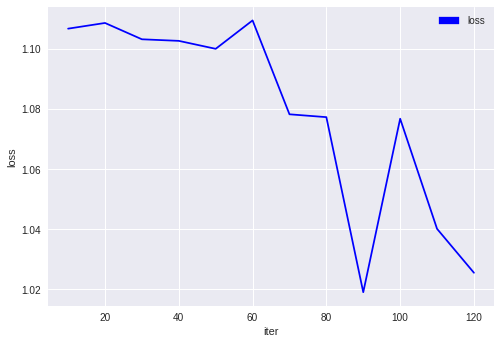

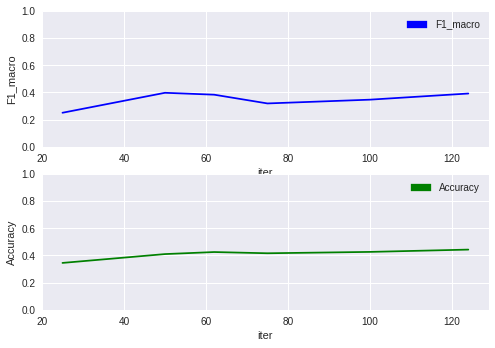

In [9]:
# This plots the loss
hooks[0].plot()
# This plots the F1 (macro) score and accuracy between 0 and 1
hooks[1].plot(ylim=[0.0, 1.0])
